In [5]:
#importing the packages panda and numpy
import pandas as pd
import numpy as np
#Reading the dataset(csv file) into the dataframe
df = pd.read_csv(r'/Users/bhavya/Downloads/Coronavirus Tweets.CSV')
#Preprocessing the dataset
#Dropping columns that aren't required
to_drop = ['reply_to_status_id',
           'reply_to_user_id',
           'reply_to_screen_name',
           'country_code',
           'place_full_name',
           'place_type',
           'account_lang']
df.drop(to_drop, inplace=True, axis=1)
df = df.dropna(how = 'all')
#Filtering the dataset such that it contains tweets only of english language
df.drop(df[df['lang'] != "en"].index, inplace = True) 
#After applying above filters the dataframe is converted to csv and it will be our dataset.
df.to_csv("File2.csv", index=False)

In [6]:
#importing the basic packages
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
import advertools as adv
import plotly.express as px
import chart_studio.plotly as p
#importing package to generate wordcloud
from wordcloud import WordCloud
#In the context of the project this package is required for generating stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#Required Package to measure similarities between texts
from sklearn.metrics.pairwise import cosine_similarity
#package to display warning messages
import warnings
warnings.filterwarnings('ignore')

#importing natural language processing toolkits
import nltk
#Package to break the sentences from the paragaraph of the tweet text into tokens
from nltk.tokenize import sent_tokenize
#importing words and stopwords from the corpus of nltk for wordcloud and sentiment analysis
from nltk.corpus import words
from nltk.corpus import stopwords
#package to break the sentences of the tweet text into seperate words
from nltk.tokenize import word_tokenize
#This package is imported to accept the list of tokenized words and stems it into root word.
from nltk.stem import WordNetLemmatizer
#This package is imported to accept the list of tokenized words and stems it into root word.
from nltk.stem import PorterStemmer
#importing these packages to perform Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


# python imports
import re
import os
from collections import Counter
import datetime as dt


# Visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook


# Saving models
import pickle

In [7]:
#Location of our csv file
data_dir = 'NewFolder'
#initialising a list
tweets = []
#Extracting the tweets from the dataset and appending it to the tweets list and storing it to dataframe
for file in sorted(os.listdir(data_dir)):
    tweets.append(pd.read_csv(data_dir + '/' + file, lineterminator = '\n'))
df = pd.concat(tweets)
df.tail()

,status_id,user_id,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,followers_count,friends_count,account_created_at,verified,lang\r
125885,1249849839090831361,3092625220,2020-04-13T23:59:57Z,52VikingConv,Denmark to reopen schools and kindergartens ne...,Twitter for Android,False,False,2939,1,309,598,2015-03-16T22:46:41Z,False,en\r
125886,1249849837933264896,1248744031292723201,2020-04-13T23:59:57Z,MrsTwisted2u,I wanted @realDonaldTrump to answer the questi...,Twitter for iPhone,False,False,91,0,4,58,2020-04-10T22:46:03Z,False,en\r
125887,1249849839782735873,1151195880365547520,2020-04-13T23:59:57Z,AA_believer,#happy_vishu 2020 🎆🎇\nWishes from @alluarjun ...,Twitter for Android,False,False,212,1,88,77,2019-07-16T18:24:20Z,False,en\r
125888,1249849845642334213,31078362,2020-04-13T23:59:58Z,ReOfSun,"I can't believe this hasn't been said yet, but...",Twitter Web App,False,False,639,0,253,351,2009-04-14T07:17:27Z,False,en\r
125889,1249849843427749889,1107380122934542338,2020-04-13T23:59:58Z,JackkD13,"#Demorats best friend has been #coronavirus, w...",Twitter for Android,False,False,1059,0,276,478,2019-03-17T20:36:10Z,False,en\r


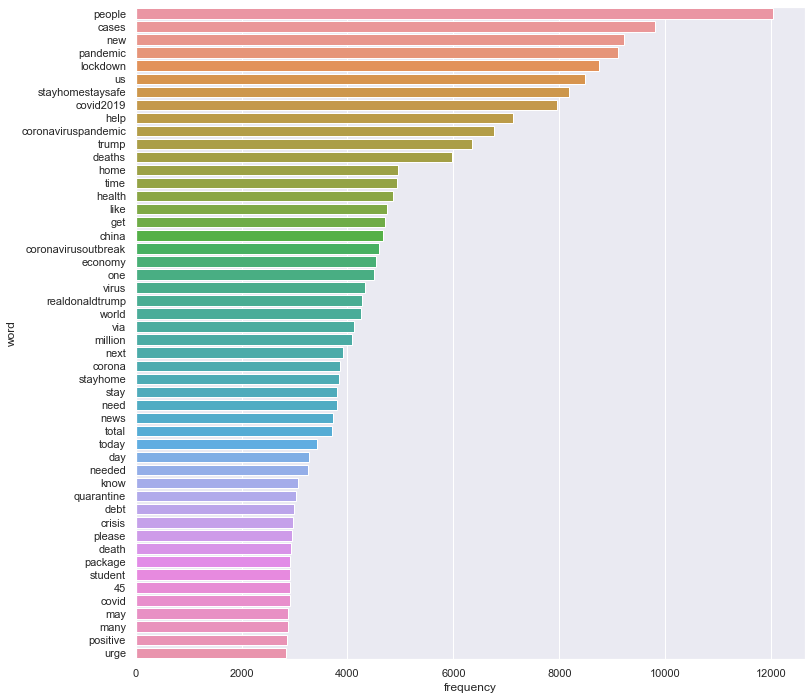

In [8]:
                    '''Code to analyse frequency of words from the tweet text'''
#Extracting only tweet text from dataframe
text_en = df['text']
#Dataset Preparation : Removing URLs,Stopwords,punctuations and hashtags and converting text into lower case
text_en_lr = text_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
text_en_lr_lc = text_en_lr.apply(lambda x: x.lower())
text_en_lr_lc_pr = text_en_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp','coronavirus', 'covid19'])
#extracting the words and storing
text_en_lr_lc_pr_sr = text_en_lr_lc_pr.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
word_list = [word for line in text_en_lr_lc_pr_sr for word in line.split()]
#Using seaborn library for styling
sns.set(style="darkgrid")
#making use of counter package to count the frequency of words 
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']
#The bargraph is plotted against frequency and the word
#plots displayed using matlplots and seaborn
fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

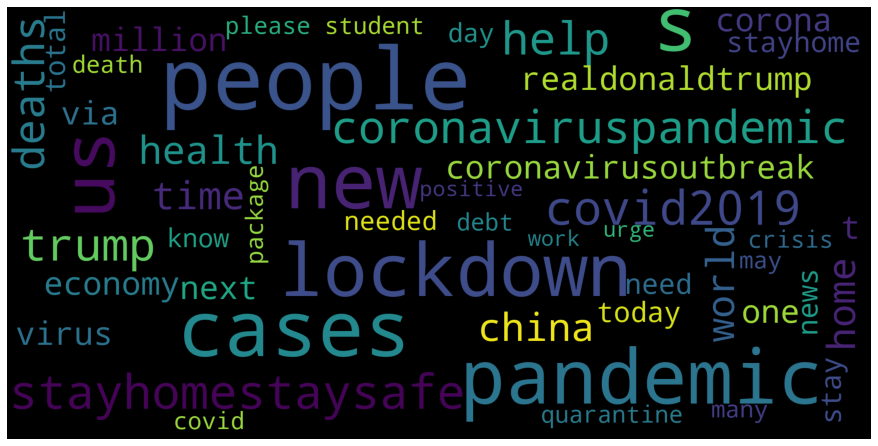

In [9]:
                              '''Code for generating Wordcloud'''
#generating the wordcloud 
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list))

#displaying the wordcloud using matplot
plt.figure(figsize = (12, 10), facecolor ='none')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')

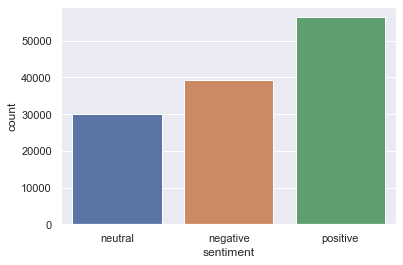

In [10]:
                            '''Code for finding Sentiments of tweets'''
# Creating a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()
'''The polarity_scores method below of SentimentIntensityAnalyzer
   object gives a sentiment dictionary.
   which contains pos, neg, neu, and compound scores.'''
sentiment_scores = text_en_lr_lc_pr_sr.apply(lambda x: sid.polarity_scores(x))
#storing the sentiment scores in a dataframe
sent_scores_df = pd.DataFrame(list(sentiment_scores))
#calculating count of the positive,negative and neutral statements
sent_scores_df['val'] = sent_scores_df['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df['val'] = sent_scores_df['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores_df['val']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']
#plotting frequency against sentiments
sns.barplot(y="count", x='sentiment', data=sent_counts)
plt.savefig('sentiment.png')

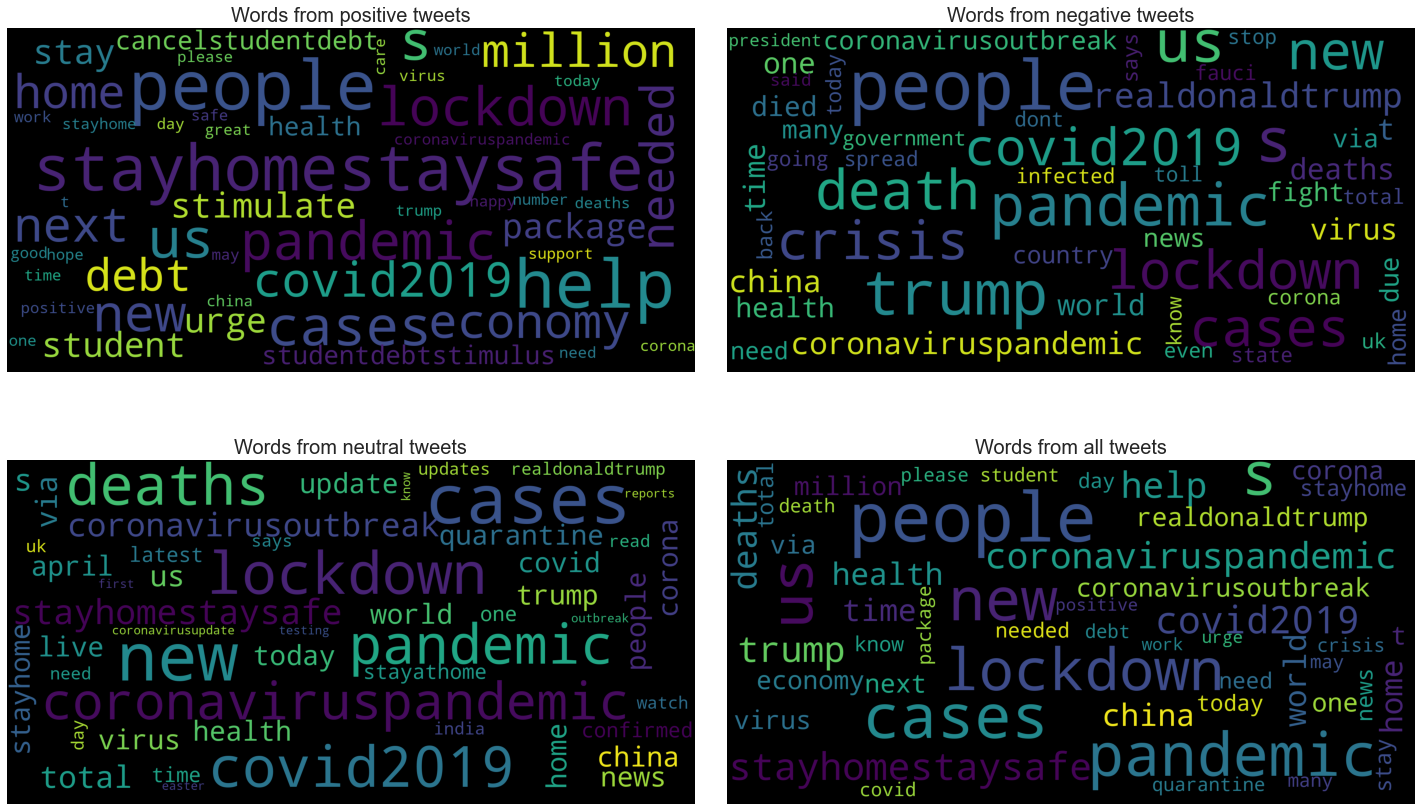

In [11]:
                      '''Code to generate WORDCLOUDs based on sentiment scores'''
polar_tweets_df = pd.DataFrame()
polar_tweets_df['tweet'] = text_en_lr_lc_pr_sr
polar_tweets_df['polarity'] = sent_scores_df['val']

#Separating tweet words based on polarity scores
positive = polar_tweets_df[polar_tweets_df['polarity'] == 'positive']['tweet']#positive tweets
negative = polar_tweets_df[polar_tweets_df['polarity'] == 'negative']['tweet']#negative tweets
neutral = polar_tweets_df[polar_tweets_df['polarity'] == 'neutral']['tweet']#neutral tweets

#Creating word lists of positive negative and neutral words
positive_list = [word for line in positive for word in line.split()]
negative_list = [word for line in negative for word in line.split()]
neutral_list = [word for line in neutral for word in line.split()]

#Generating wordcloud for positive words
positive_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(positive_list))

#Generating wordcloud for negative words
negative_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(negative_list))

#Generating wordcloud for neutral words
neutral_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral_list))

#Setting up layout to plot four different wordclouds
fig, axs = plt.subplots(2, 2, figsize = (20, 12))
fig.tight_layout(pad = 0)

#using the imshow function of the matplot package to display the generated wordclouds
#Positive word cloud
axs[0, 0].imshow(positive_cloud)
axs[0, 0].set_title('Words from positive tweets', fontsize = 20)
axs[0, 0].axis('off')
#negative word cloud
axs[0, 1].imshow(negative_cloud)
axs[0, 1].set_title('Words from negative tweets', fontsize = 20)
axs[0, 1].axis('off')
#Neutral word cloud
axs[1, 0].imshow(neutral_cloud)
axs[1, 0].set_title('Words from neutral tweets', fontsize = 20)
axs[1, 0].axis('off')
#Also displaying the wordcloud generated before classifying into positive,negative and neutral
axs[1, 1].imshow(wordcloud)
axs[1, 1].set_title('Words from all tweets', fontsize = 20)
axs[1, 1].axis('off')
#saving the plot
plt.savefig('joint_cloud.png')

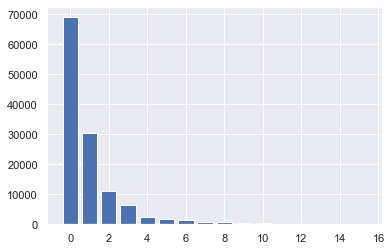

#coronavirus                                         69055
#coronavirus,#covid19                                30508
                                                     11228
#stayhomestaysafe                                     6442
#coronavirus,#lockdown                                2515
#coronavirus,#covid19,#lockdown                       1722
#covid19                                              1424
#lockdown                                              920
#covid19,#stayhomestaysafe                             658
#lockdown,#stayhomestaysafe                            447
#coronavirus,#stayhomestaysafe                         370
#coronavirus,#covid19,#stayhomestaysafe                242
#covid19,#lockdown                                     175
#coronavirus,#lockdown,#stayhomestaysafe                71
#covid19,#lockdown,#stayhomestaysafe                    58
#coronavirus,#covid19,#lockdown,#stayhomestaysafe       55
Name: hashtags, dtype: int64


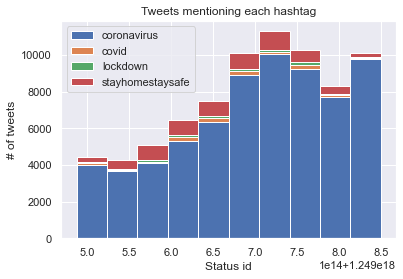

In [12]:
tweets = pd.read_csv("File1.csv")
#Function to get the hashtags
#if a particular hashtag is present in the text appending the hashtag to the list
def get_hashtag(row):
    tweet = []
    text = row["text"].lower()
    #Check for hashtag coronavirus
    if "#coronavirus" in text :
        tweet.append("#coronavirus")
    #Check for hashtag covid19
    if "#covid19" in text :
        tweet.append("#covid19")
    #check for hashtag lockdown
    if "#lockdown" in text :
        tweet.append("#lockdown")
    #check for hashtag stayhomestaysafe
    if "#stayhomestaysafe" in text  :
        tweet.append("#stayhomestaysafe") 
     
    
    return ",".join(tweet)
#Function call 
#Using the apply method to work for every row and column
tweets["hashtags"] = tweets.apply(get_hashtag,axis=1)
#finding the frequency of each hashtag
counts = tweets["hashtags"].value_counts()
#plotting the count as a bargraph
plt.bar(range(len(counts)), counts)
plt.show()
print(counts)

#Storing the status id that used the particular hashtag
cl_tweets = tweets["status_id"][tweets["hashtags"] == "#coronavirus"]
sa_tweets = tweets["status_id"][tweets["hashtags"] == "#covid19"]
tr_tweets = tweets["status_id"][tweets["hashtags"] == "#lockdown"]
a=tweets["status_id"][tweets["hashtags"] == "#stayhomestaysafe"]
#plotting the histogram
plt.hist([
         cl_tweets,
         sa_tweets,
         tr_tweets,
         a
    ],
     stacked=True,
     label=["coronavirus", "covid", "lockdown","stayhomestaysafe"])
#Giving labels to the plot
plt.legend()
plt.title("Tweets mentioning each hashtag")
plt.xlabel("Status id")
plt.ylabel("# of tweets")
plt.show()

In [15]:
#using the advertools method to extract mentions and hashtags
[x for x in dir(adv) if x.startswith('extract')]

['extract',
 'extract_currency',
 'extract_emoji',
 'extract_exclamations',
 'extract_hashtags',
 'extract_intense_words',
 'extract_mentions',
 'extract_numbers',
 'extract_questions',
 'extract_urls',
 'extract_words']

In [18]:
#methods to analyse hashtags
hashtag_summary = adv.extract_hashtags(tweets['text'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [19]:
#number of hashtags in the dataset
hashtag_summary['overview']

{'num_posts': 125890,
 'num_hashtags': 476696,
 'hashtags_per_post': 3.786607355627929,
 'unique_hashtags': 59379}

In [20]:
#To get hashtags used by people
hashtag_summary['hashtags']

[['#mumbai',
  '#maharashtra',
  '#monkeys',
  '#lockdown',
  '#coronavirus',
  '#coronaviruspandemic',
  '#coronavirusoutbreak',
  '#covid',
  '#covid19',
  '#covid2019',
  '#covidー19',
  '#covid_19'],
 ['#canadian',
  '#pandemic',
  '#realestate',
  '#homebuyers',
  '#homesellers',
  '#investors',
  '#coronavirus'],
 ['#coronavirus'],
 ['#coronavirus', '#masks'],
 ['#coronavirus', '#money'],
 ['#neilyoung',
  '#davematthews',
  '#news',
  '#musicnews',
  '#music',
  '#rocknews',
  '#rock',
  '#stayathome',
  '#covid19',
  '#coronavirus'],
 ['#coronavirus'],
 ['#coronavirus', '#masksforthepeople', '#covid19'],
 ['#coronavirus',
  '#free',
  '#ebook',
  '#digitalage',
  '#opensource',
  '#computer',
  '#covid19'],
 ['#coronavirus', '#palestinian'],
 ['#catholic', '#latinmass', '#easter', '#covid', '#coronavirus'],
 ['#coronavirus'],
 ['#winecountry', '#coronavirus'],
 ['#nypl',
  '#html',
  '#onlinelearning',
  '#covid19',
  '#coronavirus',
  '#digitalresources',
  '#libraries'],
 ['#t

In [21]:
#Hashtags limited to a count of 10 sets
#Multidimensional list of the hashtags
hashtag_summary['hashtags'][:10]

[['#mumbai',
  '#maharashtra',
  '#monkeys',
  '#lockdown',
  '#coronavirus',
  '#coronaviruspandemic',
  '#coronavirusoutbreak',
  '#covid',
  '#covid19',
  '#covid2019',
  '#covidー19',
  '#covid_19'],
 ['#canadian',
  '#pandemic',
  '#realestate',
  '#homebuyers',
  '#homesellers',
  '#investors',
  '#coronavirus'],
 ['#coronavirus'],
 ['#coronavirus', '#masks'],
 ['#coronavirus', '#money'],
 ['#neilyoung',
  '#davematthews',
  '#news',
  '#musicnews',
  '#music',
  '#rocknews',
  '#rock',
  '#stayathome',
  '#covid19',
  '#coronavirus'],
 ['#coronavirus'],
 ['#coronavirus', '#masksforthepeople', '#covid19'],
 ['#coronavirus',
  '#free',
  '#ebook',
  '#digitalage',
  '#opensource',
  '#computer',
  '#covid19'],
 ['#coronavirus', '#palestinian']]

In [22]:
#Single dimensional list of the first 10 hashtags extracted
hashtag_summary['hashtags_flat'][:10]

['#mumbai',
 '#maharashtra',
 '#monkeys',
 '#lockdown',
 '#coronavirus',
 '#coronaviruspandemic',
 '#coronavirusoutbreak',
 '#covid',
 '#covid19',
 '#covid2019']

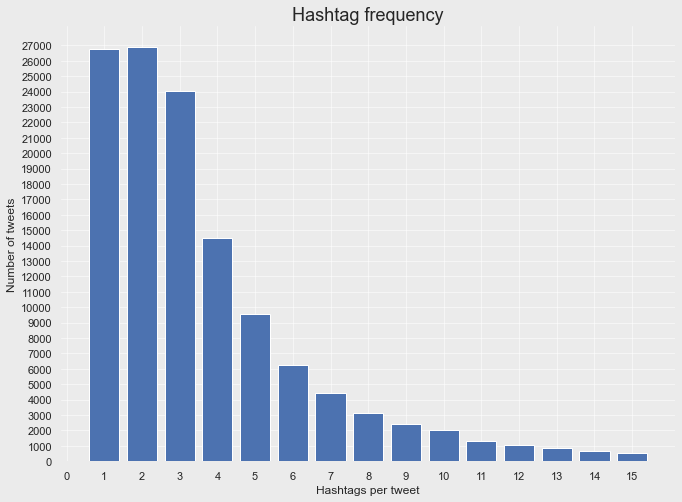

In [23]:
#Counting the hashtags used overall and hashtags used per tweet
hashtag_summary['hashtag_counts'][:20]
hashtag_summary['hashtag_freq'][:15]
#plotting the hashtags per tweet against the total number of tweets
plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
#Labelling the plot
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
#Setting up the dimensions
plt.xticks(range(16))
plt.yticks(range(0,28000, 1000))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [51]:
fig = px.bar(x=freq[2:], y=top_hashtags[2:], orientation='h')
fig.update_layout(
    height=600, width=700,
    title_text='Most Popular Hashtags',
    xaxis = {'title': 'Frequency'},
    yaxis = {'autorange': "reversed", 'title':''}
)
fig.show()

In [27]:
mention_summary = adv.extract_mentions(tweets['text'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [28]:
#extracting the number of mentions from tweet set
mention_summary['overview']

{'num_posts': 125890,
 'num_mentions': 97201,
 'mentions_per_post': 0.7721105727222178,
 'unique_mentions': 37438}

In [29]:
#Multidimensional list of mentions
mention_summary['mentions'][:15]

[[],
 [],
 [],
 [],
 [],
 ['@farmaid',
  '@johnmellencamp',
  '@davematthewsbnd',
  '@willienelson',
  '@googlenews',
  '@yahoonews'],
 [],
 [],
 [],
 [],
 [],
 ['@csuci'],
 ['@sonomavintners', '@mike_dewald', '@cococarina'],
 ['@nypl', '@nycfuture', '@nycgov', '@nycdoitt'],
 []]

In [30]:
#single dimensional list of mentions
mention_summary['mentions_flat'][:10]

['@farmaid',
 '@johnmellencamp',
 '@davematthewsbnd',
 '@willienelson',
 '@googlenews',
 '@yahoonews',
 '@csuci',
 '@sonomavintners',
 '@mike_dewald',
 '@cococarina']

In [31]:
#extracting top 20 mentions
mention_summary['top_mentions'][:20]

[('@realdonaldtrump', 4451),
 ('@narendramodi', 1205),
 ('@who', 869),
 ('@speakerpelosi', 779),
 ('@youtube', 754),
 ('@potus', 731),
 ('@cnn', 679),
 ('@senatemajldr', 650),
 ('@pmoindia', 642),
 ('@senschumer', 617),
 ('@nytimes', 617),
 ('@gopleader', 567),
 ('@borisjohnson', 497),
 ('@nygovcuomo', 382),
 ('@whitehouse', 371),
 ('@cdcgov', 354),
 ('@foxnews', 352),
 ('@msnbc', 334),
 ('@gop', 317),
 ('@joebiden', 276)]

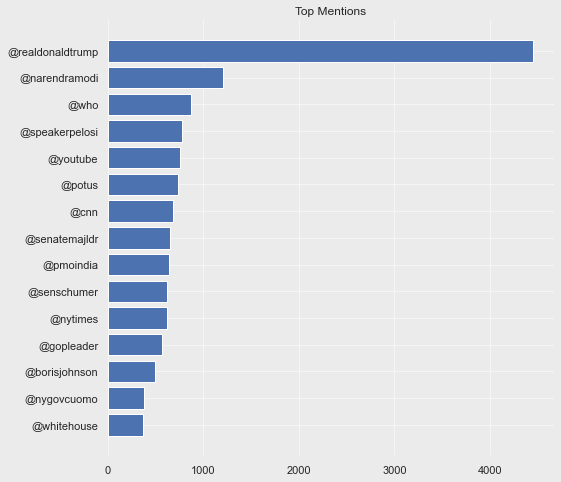

In [32]:
#using the matplot package to plot the top mentions
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
#labeling the plot
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 5000, 1000))
plt.gca().set_frame_on(False)